In [1]:
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
def ValentiNebFit(MNi,Fs,tstart,fulltrap=False):
  #variables
   # Mej_sol = 5  #1-10 solar masses
   # Ek_51 =  2e51  #1e51 ergs
   # Fs = (32*Mej_sol)/math.sqrt(Ek_51)
    #MNi = 2 # mass of nickel ranges from 0.1-2
    #tstart = 150

  #constants
    M_sun = 2e33
    c = 3e10
    tau_Ni = 8.8*86400  #decay time of Ni56 in sec
    tau_Co=9.822e6   #decay time of Co56 in sec
    e_Ni=3.90e10   # erg/s/g energy produced by 1 gram of Ni
    e_Co=6.78e9   #erg/s/g energy produced by 1 gram of Co
    
    
    #Parameters
    M_Ni = MNi*M_sun
    F = Fs
    G = 16.1*F

    # time vector in days starting at tstart days post-explosion.
    dt = (np.arange(tstart,500,1))#*86400.
    
#equations;;;;;;;;;;;;;;;;;

    #Nickel source term
    S_Ni = M_Ni*e_Ni*np.exp(-(dt*86400.)/tau_Ni)

    #Cobalt Source terms:
    Epsilon = M_Ni*e_Co*(np.exp(-(dt*86400.)/tau_Co) - np.exp(-(dt*86400.)/tau_Ni))

    S_Co1 = 0.81*Epsilon*(1-np.exp(-(F/dt)**2.))
    S_Co2 = 0.164*Epsilon*(1-np.exp(-(F/dt)**2.))*(1-np.exp(-(G/dt)**2.))
    S_Co3 = 0.036*Epsilon*(1-np.exp(-(G/dt)**2.))

    #Lum = np.zeros(len(dt))
    
    if fulltrap:
        S_Co1 = 0.81*Epsilon
        S_Co2 = 0.164*Epsilon
        S_Co3 = 0.036*Epsilon
    #Total Luminosity
    Lum = S_Ni + S_Co1 + S_Co2 + S_Co3  #This should be in erg/s
    
    return dt,Lum
   

In [11]:
#late time fulltrap
dt_a, Lum_a  = ValentiNebFit(37,180,100,fulltrap=True)
dt_b, Lum_b  = ValentiNebFit(15,180,100,fulltrap=True)
dt_c, Lum_c  = ValentiNebFit(6,180,2.6,fulltrap=True)


In [12]:
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']-2.3793415  #-2.3793415 corrects to phase to time of peak luminosity
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
file2 = 'otherbolsniin.csv'
data2 = ascii.read(file2,format='csv')
ta = data2['days_a']-25.11886432
la = data2['lum_a']
tb = data2['daysb']-26.87126005
lb = data2['lumb']
tc = data2['days_c']-1.939804858
lc = data2['lum_c']
td = data2['days_d']+1.059226366
ld = data2['lum_d']
te = data2['days_e']-66.88585493
le = data2['lum_e']
tf = data2['days_f']-3.897775984
lf = data2['lum_f']

file3 = 'bol-lumsn2017hcc.csv'
data3 = ascii.read(file3,format='csv')
time_2017hcc = data3['time']-41.33750762
lum_2017hcc = data3['lum']

In [13]:
#time_2017hcc[0:20]-41.33750762, lum_2017hcc[0:20]

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3130/3028298849.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t,np.log10(luma), 'o',color='lime',ms =10,markeredgecolor = 'k',label = 'PS1-11aop')
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3130/3028298849.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t,np.log10(luma),'lime',linestyle = '--', ms =10,linewidth = 4)
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3130/3028298849.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ta,np.log10(la),'#320a28',linewidth = 4, label ='SN2016aps')
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3130/3028298849.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(tb,np.log10(lb),'#cb9173',linewidth = 4, label ='SN2010jl')
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3130/3028298849.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(te,np

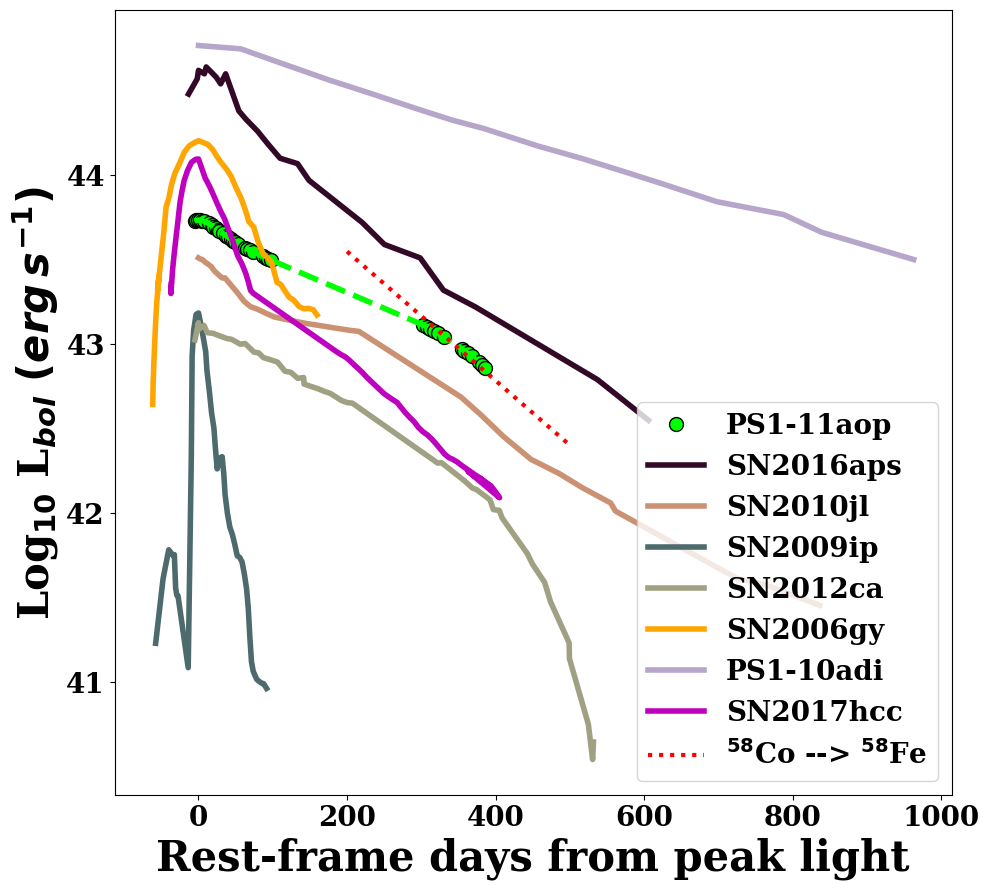

In [14]:
plt.figure(figsize=(10.80,10.20))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})
from matplotlib import rc,rcParams
from pylab import *
from scipy import *
rc('font', weight='bold')


#plot the bolometric LCs
plt.plot(t,np.log10(luma), 'o',color='lime',ms =10,markeredgecolor = 'k',label = 'PS1-11aop')
plt.plot(t,np.log10(luma),'lime',linestyle = '--', ms =10,linewidth = 4)
plt.plot(ta,np.log10(la),'#320a28',linewidth = 4, label ='SN2016aps')
plt.plot(tb,np.log10(lb),'#cb9173',linewidth = 4, label ='SN2010jl')
plt.plot(tc,np.log10(lc),'#4d6a6d',linewidth = 4, label ='SN2009ip')
plt.plot(td,np.log10(ld),'#a0a083',linewidth = 4, label ='SN2012ca')
plt.plot(te,np.log10(le),'orange',linewidth = 4, label ='SN2006gy')
plt.plot(tf,np.log10(lf),'#b6a6ca',linewidth = 4, label ='PS1-10adi')
plt.plot(time_2017hcc,lum_2017hcc,'m',linewidth = 4, label ='SN2017hcc')


#plot late time full trapping
#plt.plot(dt_a[270:1000],np.log10(Lum_a)[270:1000],'r', linestyle=':',lw=3)
plt.plot(dt_b[100:800],np.log10(Lum_b)[100:800],'r',linestyle=':',lw=3, label='$^{58}$Co --> $^{58}$Fe')
#plt.plot(dt_c[200:600],np.log10(Lum_c)[200:600],'r',linestyle=':',lw=3)


#plt.text(500,42.75,r'$M_{Ni}$:37',color = 'r', fontsize =15,ha='left', rotation=-40, wrap=True)
#plt.text(480,42.5,r'$M_{Ni}$:15',color = 'r',fontsize =15,ha='left', rotation=-40, wrap=True)
#plt.text(480,42.1,r'$M_{Ni}$:6',color = 'r',fontsize =15,ha='left', rotation=-40, wrap=True)

#plt.text(480,44.6,r'$^{58}$Co --> $^{58}$Fe',color = 'r',fontsize =15)
#plt.text(480,44.5,r'............................',color = 'r',fontsize =15)

plt.tick_params(labelsize=20)
plt.xlabel('Rest-frame days from peak light',fontsize =30,fontweight='bold')
plt.ylabel(r'Log$_{10}$ L$_{bol}$ $(erg\,s^{-1})$', fontsize =30, fontweight='bold')
plt.legend(fontsize =20)
#plt.show()

plt.savefig('bolLC.png',dpi = 300, transparent = True)

In [62]:
#finding luminosity for the end of first season
#t[10:30], 
indexb = np.where(t == 98.27495850000001)
luma[indexb]

3.14e+43


In [66]:
#finding luminosity for the start of second season
#t[10:30], 
indexc = np.where(t == 302.3555185)
luma[indexc]

1.3e+43


In [51]:
#Calculate Mdot from peak bolometric luminosity using v_shock ~ 3000 - 7000 km/s 
L = 5.42e43
eta = 0.5
vsh = 3000 * 1e5 #cgs
vw = 100 * 1e5 #cgs

mdot = (2*vw*L)/(eta*vsh**3)
mdot/6.307e+25  #0.1002 1.2731

1.2731297969921722

In [75]:
#radius
t = 302.3555185*86400
v = 7000 *1e5 #km/s
r = v*t
r

1.828646175888e+16

In [72]:
#2.5e15-5.9e15 cm at 98days
#7.8e15-1.8e16 cm at 302 days


2547286924320000

In [64]:
#Calculate Mdot from the end of first season bolometric luminosity using v_shock ~ 3000 - 7000 km/s 
L = 3.14e+43
eta = 0.5
vsh = 7000 * 1e5 #cgs
vw = 100 * 1e5 #cgs

mdot = (2*vw*L)/(eta*vsh**3)
mdot/6.307e+25  # 0.0580594 0.7375696609880849

0.05805941937807082

In [68]:
#Calculate Mdot from the start of second season bolometric luminosity using v_shock ~ 3000 - 7000 km/s 
L = 1.3e+43
eta = 0.5
vsh = 7000 * 1e5 #cgs
vw = 100 * 1e5 #cgs

mdot = (2*vw*L)/(eta*vsh**3)
mdot/6.307e+25  # 0.02403733  0.30536323 

0.02403733923295926

In [38]:
#Calculate rise_time at a given Mni and MejEk
t =[]
lum=[]

file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
tstart = 1
#lum = data1['lum']
Mni_p = 5 #np.linspace(0.5,20,20) # Nickel mass in solar mass units
Mekej_p = 15 #np.linspace(0.5,20,20) # Mekej between 0.5-2.5 for normal SNe
Lum_0 = data1['lum']
t_0 = data1['tgmax']+0.525965
#t_0 = data1['t']
mni = [] #Mass of nicke in solar mass
mekej =[] #mekej
t =[] #time
lum = [] #luminosity
RuledOut_g = []

dt, L_ph = ArnettFit(Mni_p,Mekej_p,tstart)
Lum = np.interp(t_0, dt/86400, L_ph)

t.append(dt/86400)
lum.append(L_ph)
lum, t

([array([1.91048248e+40, 2.93951471e+40, 4.16854215e+40, ...,
         6.39023518e+42, 6.37376171e+42, 6.35732565e+42])],
 [array([  1.  ,   1.25,   1.5 , ..., 302.25, 302.5 , 302.75])])

In [39]:
a = max(lum[0])
#lum.index(a)
print("The index value of a is: ", np.where(lum[0] == max(lum[0])))
#a , lum[0][93], t[0][93] #rise_time = [24.25, 52,103.25,141, 172.5]   MejEk = [2.5,5,10,15, 20]
#a , lum[0][204], t[0][204] 
#a , lum[0][409], t[0][409]
#a , lum[0][560], t[0][560] 
#a , lum[0][686], t[0][686] 


The index value of a is:  (array([560]),)
